# GoBike in San Francisco
## by Ovidiu-Mihai Anicai

## Plan to visit?

If you plan to visit San Francisco sometime soon I have a good news for you!<br>
There is a fantastic bike rental service called Bay Wheels by Lyft in the bay area!<br>
You just need \\&#36;2 to rent a bike for 30 minutes or \&#36;15 / month for unlimited 45 minute trips.<br>
The service is easy to use, just get the App, setup you account and find the nearest station.<br>
(few years back the service was called Ford GoBike)

## Data for you

In this presentation I will show you how I used the Bay Wheels public datasets to help you during your trip to The City by the Bay.<br>
I took a look on over 4.5 milion rides from 2018 and 2019 in order to get a glimpse on all about the routes, how much time riders pedal or what pricing plan is best for you.<br>
In the next slides I will share with you my findings.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df_clean = pd.read_csv('data/gobike_clean_data.csv.gz', low_memory=False, compression='gzip')
df_aggregated = pd.read_csv('data/gobike_agg1.csv.gz', low_memory=False, compression='gzip')
df_agg_by_date = pd.read_csv('data/gobike_agg2.csv.gz', low_memory=False, compression='gzip')

In [5]:
FIG_HEIGHT=7
FIG_WIDTH_SMALL = 7
FIG_WIDTH_MEDIUM = 10
FIG_WIDTH_LARGE = 15

## Busy bikers

First of all I draw a graph to show you how busy is this service.<br>
(Spoiler Alert) very busy and geting busier with peaks of almost 80 thousand rides in a day<br>
But don't worry, there are a lot of bikes (>8000) and lots of stations (225) and I'll help you find some less busy hours.

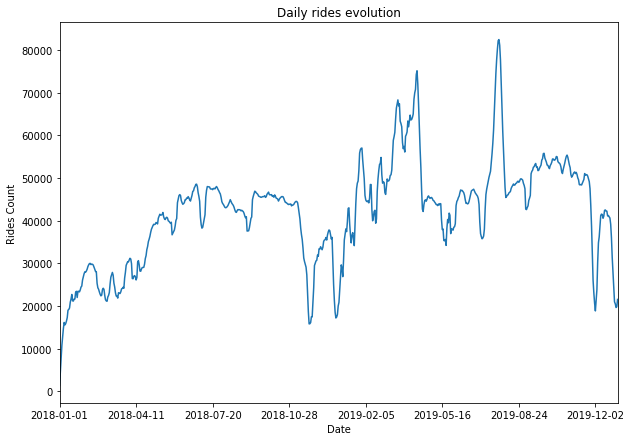

In [12]:
plt.figure(figsize=(FIG_WIDTH_MEDIUM,FIG_HEIGHT))
df_clean_by_date = df_clean.groupby(['date'])['start_time'].count()
df_by_date_rolling = df_clean_by_date.rolling(7, min_periods=1).sum()

df_by_date_rolling.plot();
plt.title('Daily rides evolution')
plt.xlabel('Date')
plt.ylabel('Rides Count');

## Busy Hours

Going further I took a look on how many trips we can count each hour of the day.<br>
A lot of people use this bikes to comute to work, so if you avoid 9am and 17pm you will find more bikes available.

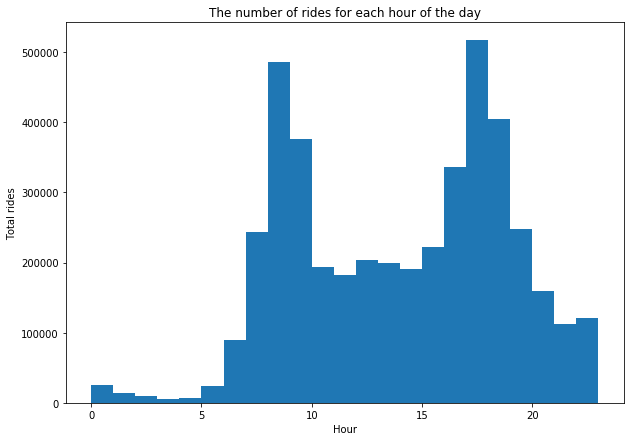

In [13]:
plt.figure(figsize = (FIG_WIDTH_MEDIUM,FIG_HEIGHT))

plt.hist(data = df_clean, x = 'hour', bins=23);
plt.title('The number of rides for each hour of the day');
plt.xlabel('Hour')
plt.ylabel('Total rides');

## Busy Hours epr day

This service is used intensly by the residents of San Francisco.<br>
After investigating each day of the weel I found a better period for your trips.<br>
During the weekends the busiest hours are around 1pm but is way less than a normal working day.

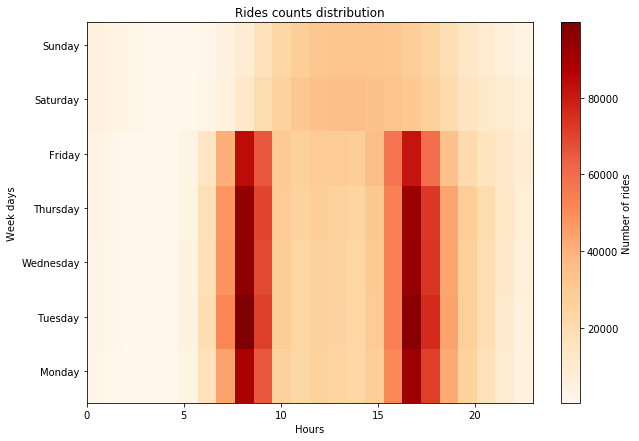

In [24]:
def ride_distribtion(df, name=None):
    
    plt.figure(figsize = (FIG_WIDTH_MEDIUM,FIG_HEIGHT)) 

    plt.hist2d(df['hour'], df['dayofweek'], bins = [24, 7], 
               cmap = 'OrRd', cmin = 0.5)
    suffix = ''
    if name:
        suffix = ' for ' + name
    plt.title('Rides counts distribution' + suffix)
    plt.xlabel('Hours')
    plt.ylabel('Week days')
    plt.yticks(np.arange(0.5, 6.5, step=6/7), 
         ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'));
    plt.colorbar(label='Number of rides');
    plt.show();

ride_distribtion(df_clean)
# ride_distribtion(df_clean[df_clean['user_type'] == 'Customer'].copy(), 'Customers')
# ride_distribtion(df_clean[df_clean['user_type'] == 'Subscriber'].copy(), 'Subscribers')

## Watch out for the busy places and take short trips

The busiest stations are the **train and ferry stations**, **Soma Neighborhood** and the ones on **The Embarcadero St**.<br>
Short rides are the bikers favorite during week days and in the weekend they like to pedall more.<br>
Anyway, in order **not to pay extra \\&#36;3 per 15 minutes** you just need to ride **less then 30 minutes**.


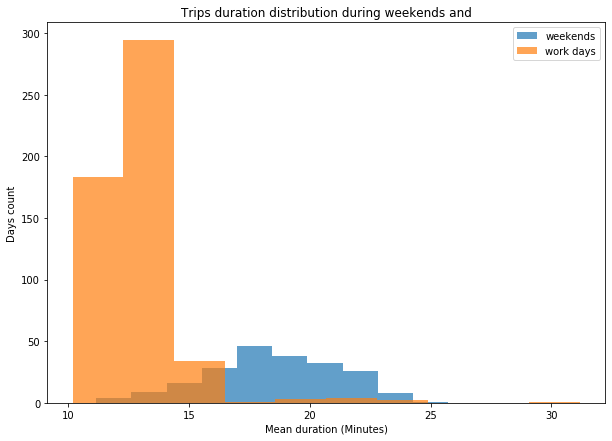

In [21]:
plt.figure(figsize = (FIG_WIDTH_MEDIUM,FIG_HEIGHT)) 

plt.hist(df_agg_by_date[df_agg_by_date['is_weekend'] == 1]['duration_mean'], alpha=0.7, label='weekends')
plt.hist(df_agg_by_date[df_agg_by_date['is_weekend'] == 0]['duration_mean'], alpha=0.7, label='work days')
plt.title('Trips duration distribution during weekends and')
plt.xlabel('Mean duration (Minutes)')
plt.ylabel('Days count')
plt.legend();

## Best pricing offer for you
For users there are three main offers
- **Single Ride** with \\&#36;2 get a 30 minutes ride
- **Access Pass** with \\&#36;10 get unlimited 30 minute rides for a day
- **Monthly Memership** for \\&#36;15 get unlimited 45 minute rides for a month

If you plan to ride more than 5 times or two days you should definitely get the **Monthly Memership**!<br>
In my analysis I found that very few people choose the first two options, many more go as I recomended


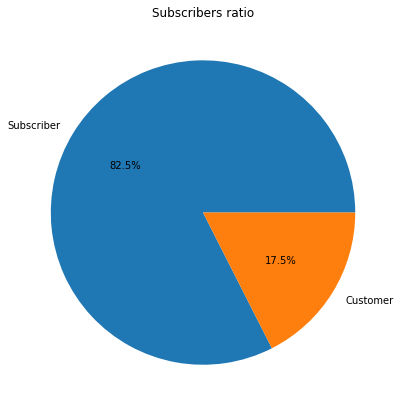

In [18]:
plt.figure(figsize=(FIG_WIDTH_MEDIUM,FIG_HEIGHT))
user_types_count=df_clean.user_type.value_counts()
plt.pie(user_types_count, labels = user_types_count.index, autopct='%1.1f%%');
plt.title('Subscribers ratio');

## Thank you and have a nice trip!

<br>
<br>
<br>

by Ovidiu-Mihai Anicai